In [57]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/taekyounglee/Documents/projects/Finance_Project_COVID19_ETF/data/temp_df_final.csv', index_col = 0).iloc[:, 1:]

df2 = pd.read_csv('/Users/taekyounglee/Documents/projects/Finance_Project_COVID19_ETF/data/섹터ETF취합/Add_TI_섹터ETF/TIGER200_커뮤니케이션서비스_TI.csv', index_col = 0)
df
df2

,날짜,종가,diff_5,diff_20,ma_5,ma_20
1119,2019-09-05,16325.0,0.004615,0.035850,16435.0,16142.50
1118,2019-09-06,16385.0,0.006759,0.032777,16457.0,16168.50
1117,2019-09-09,16530.0,0.001515,0.026708,16462.0,16190.00
1116,2019-09-10,16530.0,-0.001510,0.037665,16457.0,16220.00
1115,2019-09-11,16540.0,0.001514,0.044522,16462.0,16255.25
...,...,...,...,...,...,...
4,2024-03-15,17780.0,0.003953,-0.049706,17959.0,18145.50
3,2024-03-18,17760.0,-0.010033,-0.051029,17923.0,18097.75
2,2024-03-19,17570.0,-0.024972,-0.067905,17833.0,18033.75
1,2024-03-20,17595.0,-0.023856,-0.064842,17747.0,17972.75


In [58]:
# Converting 'stateDt' to datetime format
df['stateDt'] = pd.to_datetime(df['stateDt'], format='%Y%m%d')


# Renaming the 'stateDt' column to 'Date'
df.rename(columns={'stateDt': 'Date'}, inplace=True)


df.tail()  # Display the last few rows to check the changes


,Date,decideCnt,deathCnt
1106,2023-04-15,30978954.0,34368.0
1107,2023-04-17,30994088.0,34376.0
1108,2023-04-18,31009261.0,34386.0
1109,2023-04-19,31025769.0,34392.0
1110,2023-04-20,31039863.0,34401.0


In [59]:
# '날짜'와 '종가' 컬럼 이름 변경
df2.rename(columns={'날짜': 'Date', '종가': 'Close'}, inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')
df2['diff_1'] = df2['Close'].pct_change()





df2.head()  # 변경된 데이터프레임의 마지막 몇 행을 확인합니다.


,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1
1119,2019-09-05,16325.0,0.004615,0.035850,16435.0,16142.50,NaN
1118,2019-09-06,16385.0,0.006759,0.032777,16457.0,16168.50,0.003675
1117,2019-09-09,16530.0,0.001515,0.026708,16462.0,16190.00,0.008850
1116,2019-09-10,16530.0,-0.001510,0.037665,16457.0,16220.00,0.000000
1115,2019-09-11,16540.0,0.001514,0.044522,16462.0,16255.25,0.000605


In [60]:
# df에서 decideCnt와 deathCnt의 차이를 계산하고, 이를 %로 변환
df['decideCnt_diff'] = df['decideCnt'].diff().fillna(0)
df['deathCnt_diff'] = df['deathCnt'].diff().fillna(0)
df['decideCnt_diff_perc'] = df['decideCnt_diff'] / df['decideCnt'].shift(5)
df['deathCnt_diff_perc'] = df['deathCnt_diff'] / df['deathCnt'].shift(5)
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # 무한대 값을 NaN으로 대체

# df2와 df를 'Date' 기준으로 합치기
df_combined = pd.merge(df2, df[['Date', 'decideCnt_diff_perc', 'deathCnt_diff_perc']], on='Date', how='outer')

# NaN이 포함된 행 제거
df_combined.dropna(inplace=True)

df_combined.tail()

,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1,decideCnt_diff_perc,deathCnt_diff_perc
891,2023-04-14,19070.0,0.038106,0.067749,18685.0,18384.25,0.013822,0.000377,0.000146
892,2023-04-17,18950.0,0.031573,0.048990,18801.0,18428.50,-0.006293,0.000489,0.000233
893,2023-04-18,18775.0,0.008324,0.030461,18832.0,18456.25,-0.009235,0.000490,0.000291
894,2023-04-19,18680.0,0.006737,0.002146,18857.0,18458.25,-0.005060,0.000533,0.000175
895,2023-04-20,18575.0,-0.012493,0.010884,18810.0,18468.25,-0.005621,0.000455,0.000262


In [61]:
df_combined



,Date,Close,diff_5,diff_20,ma_5,ma_20,diff_1,decideCnt_diff_perc,deathCnt_diff_perc
116,2020-02-27,17980.0,-0.040043,-0.003326,18330.0,18336.00,-0.019094,1.166282,0.500000
117,2020-02-28,17555.0,-0.058713,-0.016802,18111.0,18321.00,-0.023637,0.948505,0.000000
118,2020-03-02,17475.0,-0.041415,-0.016878,17960.0,18306.00,-0.004557,0.377478,0.333333
119,2020-03-03,17635.0,-0.044691,-0.020006,17795.0,18288.00,0.009156,0.339751,0.461538
120,2020-03-04,18355.0,0.001364,0.018873,17800.0,18305.00,0.040828,0.220796,0.307692
...,...,...,...,...,...,...,...,...,...
891,2023-04-14,19070.0,0.038106,0.067749,18685.0,18384.25,0.013822,0.000377,0.000146
892,2023-04-17,18950.0,0.031573,0.048990,18801.0,18428.50,-0.006293,0.000489,0.000233
893,2023-04-18,18775.0,0.008324,0.030461,18832.0,18456.25,-0.009235,0.000490,0.000291
894,2023-04-19,18680.0,0.006737,0.002146,18857.0,18458.25,-0.005060,0.000533,0.000175


Processing Window 240: 100%|██████████| 514/514 [1:36:55<00:00, 11.31s/it]


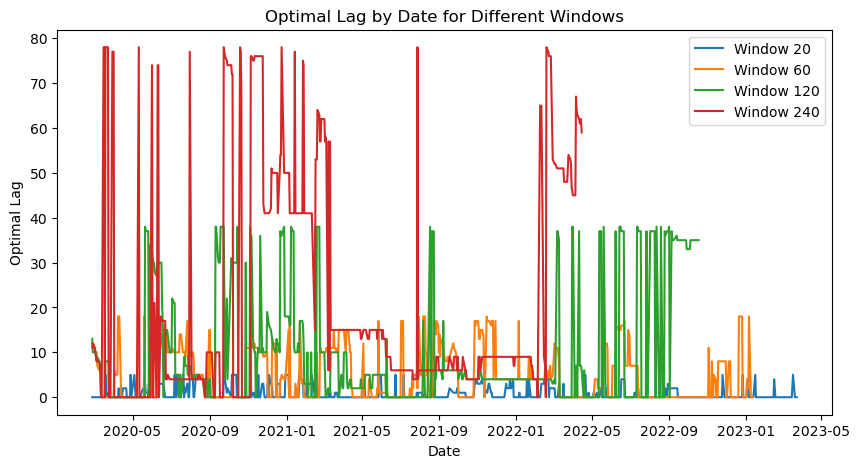

In [62]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt
from tqdm import tqdm 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

windows = [20, 60, 120, 240]
max_lags = {20: 5, 60: 18, 120: 38, 240: 78}

def optimal_lag(df_combined, window, max_lag):
    optimal_lags = []
    # tqdm is used here to show progress
    for start in tqdm(range(len(df_combined) - window + 1), desc=f'Processing Window {window}'):
        sub_df_combined = df_combined.iloc[start:start + window]
        best_p_value = float('inf')
        best_lag = 0
        for lag in range(1, max_lag + 1):
            result = grangercausalitytests(sub_df_combined[['diff_5', 'decideCnt_diff_perc']], maxlag=lag, verbose=False)
            p_value = result[lag][0]['ssr_ftest'][1] 
            if p_value < best_p_value:
                best_p_value = p_value
                best_lag = lag
        if best_p_value > 0.1:
            best_lag = 0
        optimal_lags.append(best_lag)
    return optimal_lags + [np.nan] * (window - 1) 


for window in windows:
    max_lag = max_lags[window]
    df_combined[f'optimal_lag_{window}'] = optimal_lag(df_combined, window, max_lag)

plt.figure(figsize=(10, 5))
for window in windows:
    plt.plot(df_combined['Date'], df_combined[f'optimal_lag_{window}'], label=f'Window {window}')
plt.xlabel('Date')
plt.ylabel('Optimal Lag')
plt.title('Optimal Lag by Date for Different Windows')
plt.legend()
plt.show()

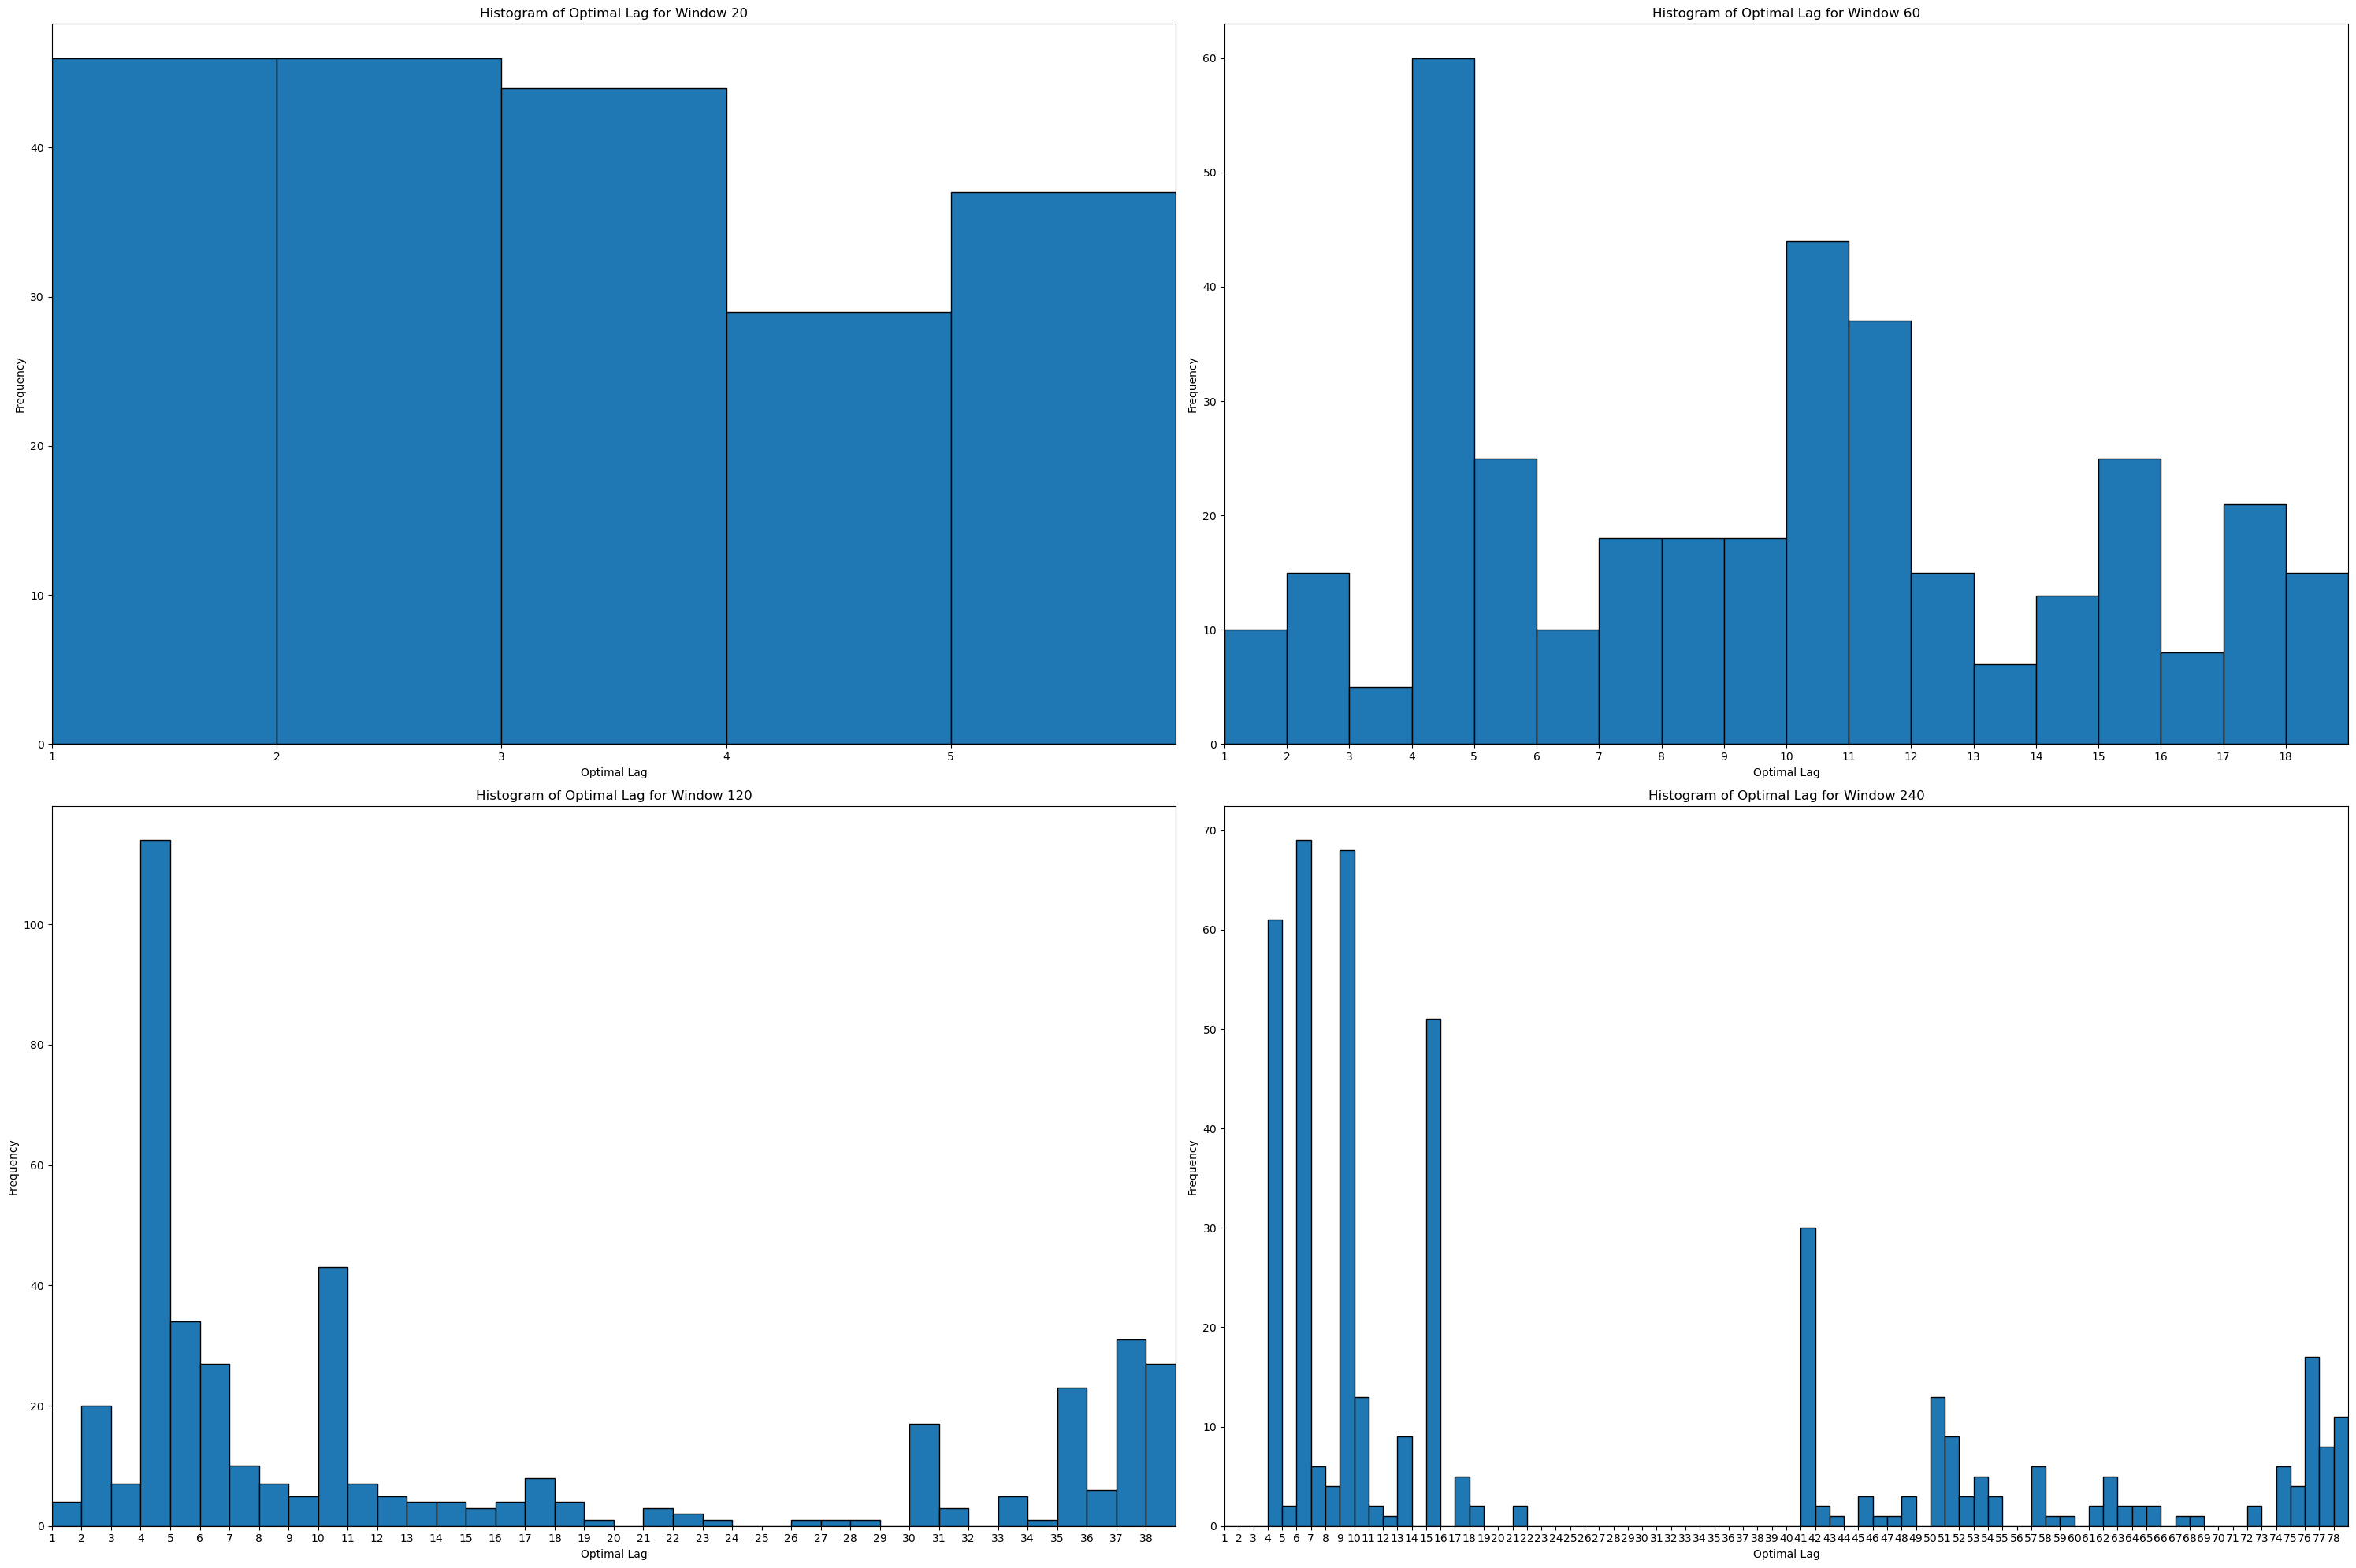

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(30, 20))
axs = axs.flatten()

for i, window in enumerate(windows):
    optimal_lag_column = df_combined[f'optimal_lag_{window}']
    # Filter out lag = 0 and lag = max_lag
    filtered_lag = optimal_lag_column[(optimal_lag_column != 0)]
    axs[i].hist(filtered_lag.dropna(), bins=range(int(filtered_lag.max()) + 2), edgecolor='black')
    axs[i].set_title(f'Histogram of Optimal Lag for Window {window}')
    axs[i].set_xlabel('Optimal Lag')
    axs[i].set_ylabel('Frequency')

    if window == 20:
        axs[i].set_xticks(range(1, 6))
        axs[i].set_xlim(1, 6)
    elif window == 60:
        axs[i].set_xticks(range(1, 19))
        axs[i].set_xlim(1, 19)
    elif window == 120:
        axs[i].set_xticks(range(1, 39))
        axs[i].set_xlim(1, 39)
    elif window == 240:
        axs[i].set_xticks(range(1, 79))
        axs[i].set_xlim(1, 79)


plt.tight_layout()
plt.show()